In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [33]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [34]:
# Leer datos separados por una coma
# data = np.loadtxt(os.path.join('Datasets', 'ex1data1.txt'), delimiter=',')
data = np.loadtxt('/content/gdrive/MyDrive/Colab Notebooks/machine learning/winequality-red.txt', delimiter=',')
# print(data[:3, :])
X, y = data[:, 0], data[:, 1]
print("---"*10)
print(X)
print(y)
m = y.size  # m = numero de ejemplos de entrenamiento
# m = x.size
print(X.size, y.size)

------------------------------
[7.4 7.8 7.8 ... 6.3 5.9 6. ]
[0.7   0.88  0.76  ... 0.51  0.645 0.31 ]
1599 1599


In [35]:
def plotData(x, y):
    #Grafica los puntos x e y en una figura nueva. 
    
    fig = pyplot.figure()  # abre una nueva figura
    
    pyplot.plot(x, y, 'ro', ms=5, mec='r')
    pyplot.ylabel('Beneficio en $10,000')
    pyplot.xlabel('Poblacion de una ciudad en 10,000s')

In [36]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)
print(X)

[[1.  7.4]
 [1.  7.8]
 [1.  7.8]
 ...
 [1.  6.3]
 [1.  5.9]
 [1.  6. ]]


In [37]:
def calcularCosto(X, y, theta):
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento
   
    J = 0
    h = np.dot(X, theta)
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [38]:
J = calcularCosto(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] \n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente) 32.07\n')

# pruebas adicionales de la función de costes
J = calcularCosto(X, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2]\n Costo calculado = %.2f' % J)
print('Valor de costo esperado (aproximadamente)  54.24')

Con theta = [0, 0] 
 Costo calculado = 0.16
Valor de costo esperado (aproximadamente) 32.07

Con theta = [-1, 2]
 Costo calculado = 120.41
Valor de costo esperado (aproximadamente)  54.24


In [39]:
def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento
    
    # hace una copia de theta, para evitar cambiar la matriz original, 
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy()
    
    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración
    
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # save the cost J in every iteration
        J_history.append(calcularCosto(X, y, theta))
    
    return theta, J_history

In [40]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente
iterations = 100000
alpha = 0.003

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print('Valores theta esperados (aproximadamente): [-3.6303, 1.1664]')
print(J_history[:5])
print(J_history[-5:])

Theta encontrada por descenso gradiente: 0.7470, -0.0263
Valores theta esperados (aproximadamente): [-3.6303, 1.1664]
[0.10493119992812881, 0.0742441190384276, 0.05555447787087471, 0.04417131480287463, 0.037237819726753246]
[0.014970126141346867, 0.014970126141346818, 0.014970126141346773, 0.014970126141346725, 0.014970126141346681]


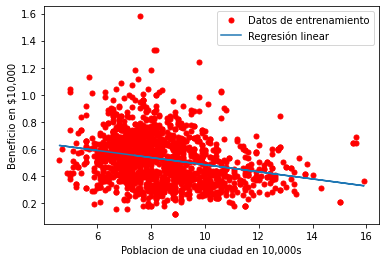

In [41]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

In [42]:
# Predecir valores de beneficio para poblaciones de 35,000 y 70,000
predict1 = np.dot([1, 3.5], theta)
print('Para una población = 35,000, se predice un beneficio de {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 9], theta)
print('Para una población de = 70,000, se predice un beneficio de {:.2f}\n'.format(predict2*10000))

Para una población = 35,000, se predice un beneficio de 6547.74

Para una población de = 70,000, se predice un beneficio de 5098.99



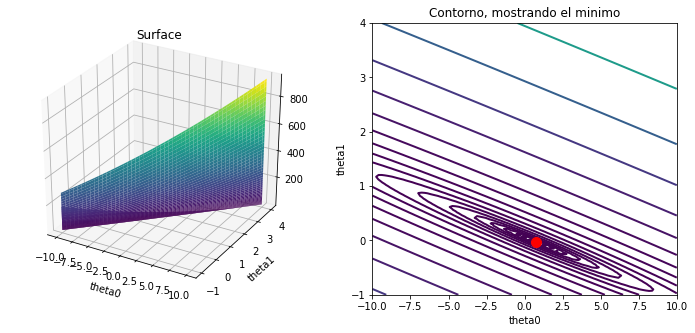

In [43]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = calcularCosto(X, y, [theta0, theta1])
        
# Debido a la forma en que funcionan las cuadrículas en el comando surf, 
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')
pass